In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random

bank = pd.read_csv("bank-additional.csv")

In [3]:
#Partitioning the data
bank_train, bank_test = train_test_split(bank, test_size = 0.25, random_state = 7)

In [4]:
print("bank: ", bank.shape[0])
print("bank_train: ",bank_train.shape[0])
print("bank_test: ",bank_test.shape[0])

bank:  41188
bank_train:  30891
bank_test:  10297


<Axes: xlabel='Partition'>

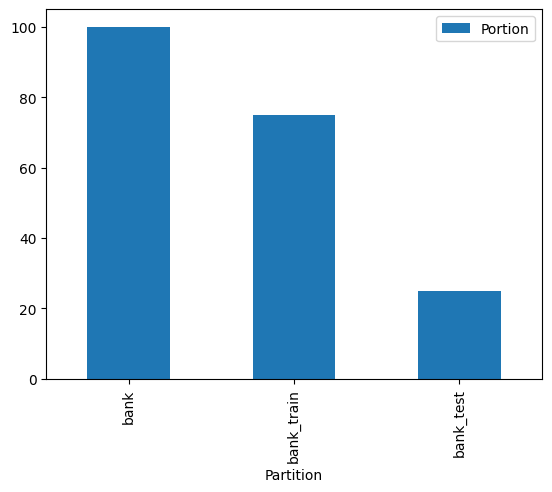

In [5]:
df = pd.DataFrame({'Partition': ['bank', 'bank_train', 'bank_test'],
                   'Portion':[(bank.shape[0]/bank.shape[0])*100,
                              (bank_train.shape[0]/bank.shape[0])*100,
                              (bank_test.shape[0]/bank.shape[0])*100]
                   })
df.set_index('Partition').plot(kind='bar')

In [6]:
#Balancing the training data set
bank_train['response'].value_counts()

response
no     27365
yes     3526
Name: count, dtype: int64

In [7]:
to_resample = bank_train.loc[bank_train['response'] == "yes"]

In [8]:
our_resample = to_resample.sample(n = 8202, replace = True)

In [9]:
x=(0.3*30891-3526)/(1-0.3)
print(round(x))

8202


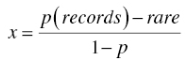

In [10]:
bank_train_rebal = pd.concat([bank_train, our_resample])

In [11]:
bank_train_rebal['response'].value_counts()

response
no     27365
yes    11728
Name: count, dtype: int64

In [12]:
print(bank_train_rebal.shape[0])
yes=bank_train_rebal.loc[bank_train_rebal['response']=='yes'].shape[0]
round((yes/bank_train_rebal.shape[0])*100)

39093


30

<Axes: xlabel='Response'>

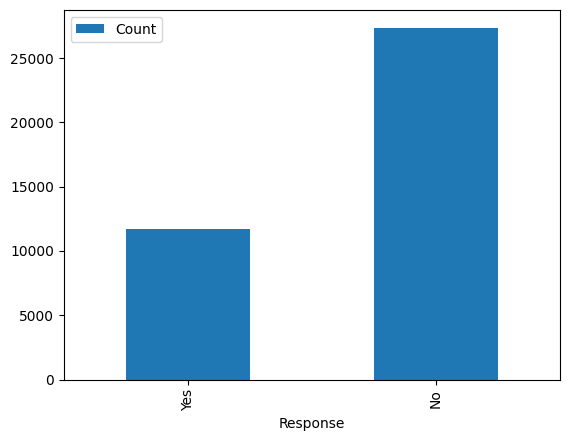

In [13]:
df = pd.DataFrame({'Response': ['Yes', 'No'],
                   'Count':[bank_train_rebal.loc[bank_train_rebal['response']=='yes'].shape[0],
                              bank_train_rebal.loc[bank_train_rebal['response']=='no'].shape[0]]
                   })
df.set_index('Response').plot(kind='bar')